In [1]:
import numpy as np                        # Math
import scipy
import scipy.stats as stats               # Statistics
from matplotlib import pyplot as plt      # Plots
from astroML import stats as astroMLstats
from sklearn.neighbors import KernelDensity
from tqdm.notebook import tqdm

Define and look at the function f

In [2]:
def f (chi):
    return np.sqrt( (1 + np.sqrt(1-chi**2)) / 2)

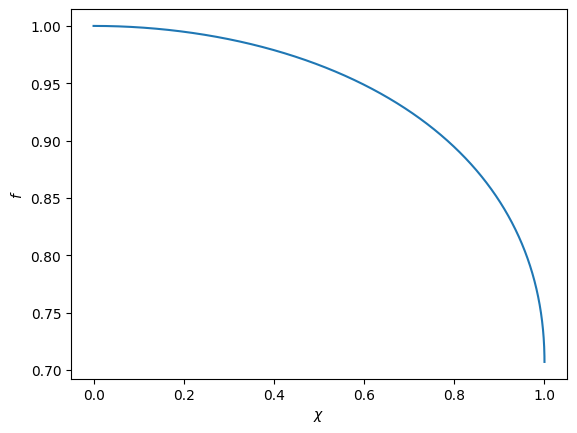

In [3]:
plt.plot(np.linspace(0,1,10000),f(np.linspace(0,1,10000)));
plt.xlabel('$\chi$')
plt.ylabel('$f$');

Irreducible mass

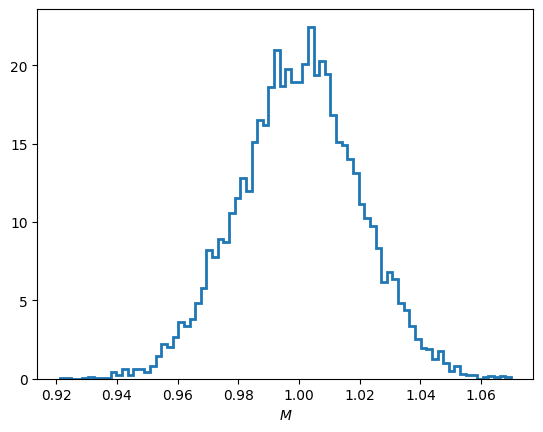

In [4]:
mean = 1
sigma = 0.02
N = 10000

M = np.random.normal(loc=mean, scale=sigma, size=N)
chi = np.random.uniform(0,1,N)

plt.hist(M,density=True,histtype='step',bins=80,lw=2)
plt.xlabel('$M$')

M_irr = f(chi) * M

Basic histogram

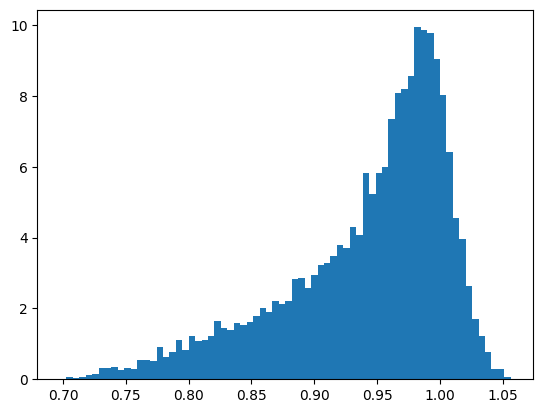

In [5]:
plt.hist(M_irr, density=True, bins=70)
plt.show()

Histogram using the **"Freedman-Diaconis rule"**

Number of bins:49


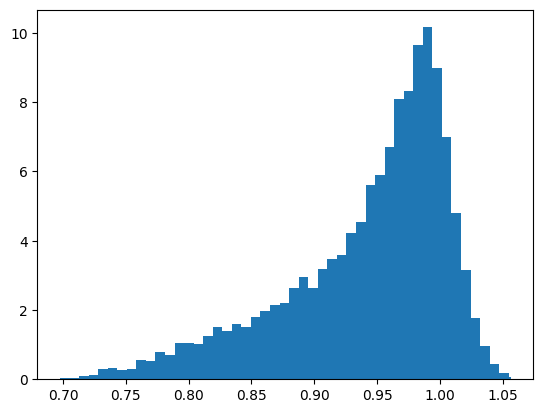

In [6]:
sigmaG2 = astroMLstats.sigmaG(M_irr)

binsize = 2.7*sigmaG2/(N**(1/3))

binsG = np.append(np.arange(start=M_irr.min(), stop=M_irr.max(), step=binsize) , M_irr.max()) #Complete
print("Number of bins:" + str(len(binsG)))

plt.hist(M_irr, bins=binsG, density=True)
plt.show()


Play with sigma (prof solution)

In [7]:
def plot_M_Mirr(scale):
    
    x = np.linspace(1-5*scale,1+5*scale,N)
    M = scipy.stats.norm.pdf(x, 1, scale)

    M=np.random.normal(loc=1,scale=scale,size=N)

    chi = np.random.uniform(0,1,N)
    m = f(chi)

    plt.hist(M*m,density=True,histtype='step',bins=80);

    x = np.linspace(min(1-5*scale,1/np.sqrt(2)),1+5*scale,N)

    def integrand(f,x):
        return ((2/np.pi)**0.5 / scale ) * np.exp(-(x/f -1)**2 /(2*scale**2)) * (2*f**2-1)/(1 - f**2)**0.5 / f

    Mirr = [scipy.integrate.quad(lambda f: integrand(f,xt), 1/2**0.5,1)[0] for xt in tqdm(x)]

    plt.plot(x,Mirr)
    plt.xlabel('$M_{\\rm irr}$');

  0%|          | 0/10000 [00:00<?, ?it/s]

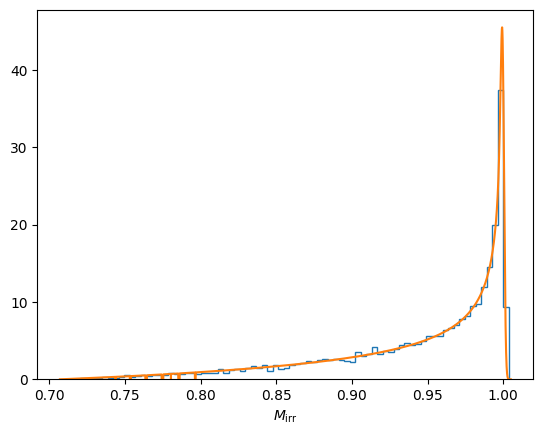

In [8]:
# Small sigma --> pdf like f
plot_M_Mirr(0.001)

  0%|          | 0/10000 [00:00<?, ?it/s]

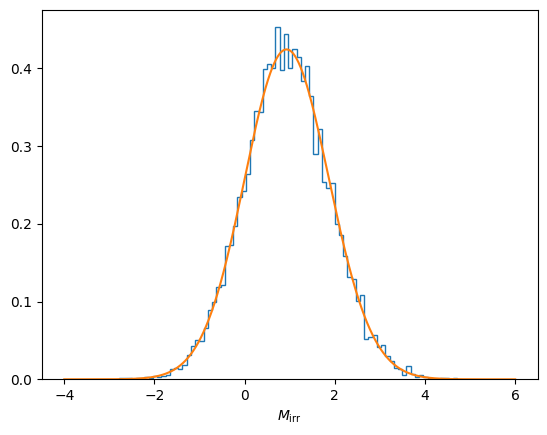

In [9]:
# Large sigma --> pdf like M
plot_M_Mirr(1)

Check this with a KS test

In [10]:
sigmas = np.logspace(-5,5,20)
ksM = []
ksf = []

chi = np.random.uniform(0,1,N)
m = f(chi)

for sigma in tqdm(sigmas):

    M=np.random.normal(loc=1,scale=sigma,size=N)

    ksM.append(scipy.stats.ks_2samp(M, M*m))
    ksf.append(scipy.stats.ks_2samp(M_irr, M*m))

ksM= np.array(ksM)
ksf= np.array(ksf)

  0%|          | 0/20 [00:00<?, ?it/s]

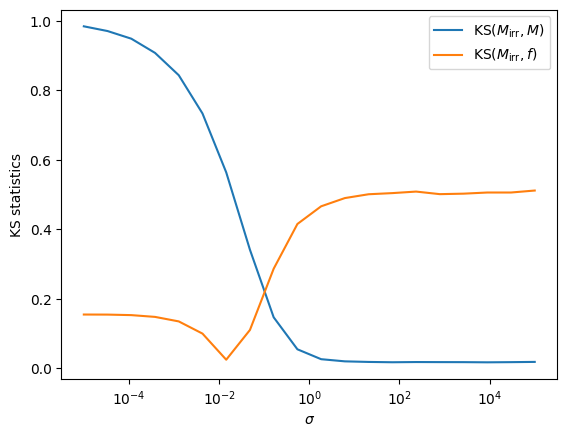

In [11]:
plt.plot(sigmas,ksM[:,0],label="KS$(M_{\\rm irr}, M)$")
plt.plot(sigmas,ksf[:,0],label="KS$(M_{\\rm irr}, f)$")
plt.semilogx()
plt.xlabel("$\sigma$")
plt.ylabel('KS statistics')
plt.legend();

Plot with a KDE

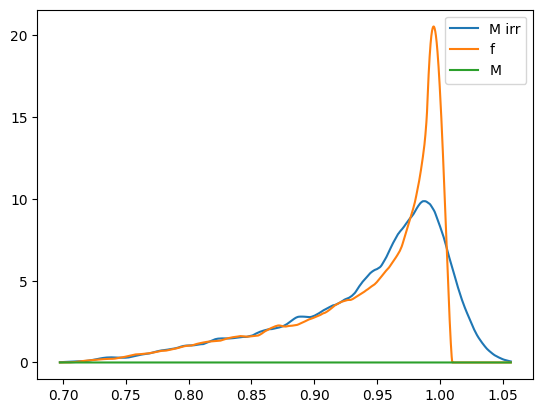

In [12]:
xgrid = np.linspace(M_irr.min(),M_irr.max(),N) 

def kde_sklearn(data, bandwidth, kernel):
    kde_skl = KernelDensity(bandwidth = bandwidth, kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis])

    return np.exp(log_pdf)

bandwidth = 0.01
PDF_M_irr = kde_sklearn(M_irr,bandwidth=bandwidth,kernel="epanechnikov")
PDF_f = kde_sklearn(f(chi),bandwidth=bandwidth,kernel="epanechnikov") 
PDF_M = kde_sklearn(M,bandwidth=bandwidth,kernel="epanechnikov")

plt.plot(xgrid, PDF_M_irr, label="M irr")
plt.plot(xgrid, PDF_f, label="f")
plt.plot(xgrid, PDF_M, label="M")

plt.legend()
plt.show()

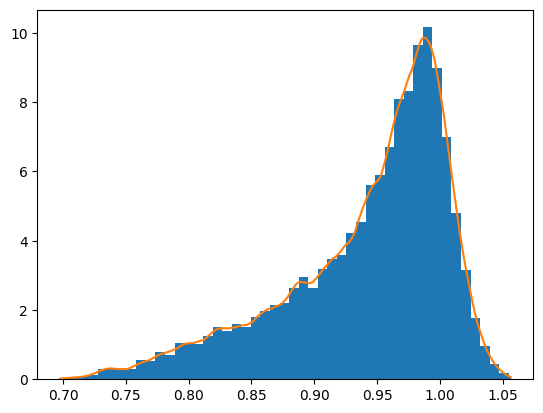

In [13]:
plt.hist(M_irr, bins=binsG, density=True)
plt.plot(xgrid, PDF_M_irr, label="M")
plt.show()

Compute the pdfs of $M_{\rm irr}$ from their mathematical definitions and confront with previous results

In [14]:
x = np.linspace(M_irr.min(),M_irr.max(),N) 
def integrand(f,x):
        return ((2/np.pi)**0.5 / sigma ) * np.exp(-(x/f-mean)**2 /(2*sigma**2)) * (2*f**2-1)/(1 - f**2)**0.5 / f

Mirr_pdf = [scipy.integrate.quad(lambda f: integrand(f,xt), 1/2**0.5,1)[0] for xt in tqdm(x)]

  0%|          | 0/10000 [00:00<?, ?it/s]

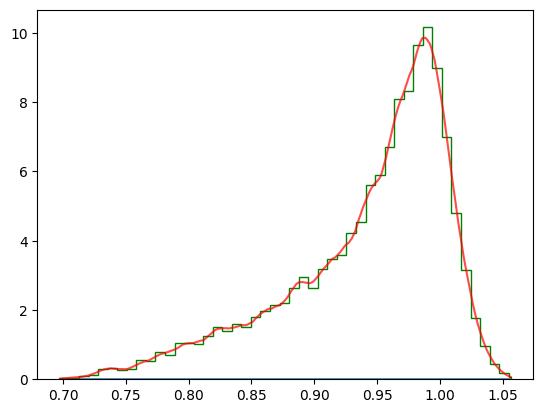

In [15]:
plt.plot(x, Mirr_pdf)
plt.hist(M_irr, bins=binsG, density=True, histtype = 'step', color="green")
plt.plot(xgrid, PDF_M_irr, label="M", color="red", alpha = 0.7)
plt.show()